 We install the package using this command #install.packages("xlsx",repos="http://cran.us.r-project.org")
and then read the data using xlsx package

In [1]:
library(xlsx)

Loading required package: rJava
Loading required package: xlsxjars


In [2]:
linear_data <- read.xlsx("C://Users//Fnu//Downloads//lab3Data//NHLTop100.xlsx", sheetName="Top 100") 

Now to check the data we use head function given in R

In [3]:
head(linear_data)
typeof(linear_data$Player)

Rank,Player,Team,Pos,X1st.NHL.Season,Last.NHL.Season,GP,G,A,P,X...,PIM,PP,SH,GW,GT,OT,Shots
1,Wayne Gretzky,NA,C,1979-1980,1998-1999,1487,894,1963,2857,518,577,204,73,91,12,1,5089
2,Mark Messier,NA,C,1979-1980,2003-2004,1756,694,1193,1887,210,1910,179,63,92,15,7,4219
3,Gordie Howe,NA,R,1946-1947,1979-1980,1767,801,1049,1850,87,1685,39,5,18,NA,NA,NA
4,Ron Francis,NA,C,1981-1982,2003-2004,1731,549,1249,1798,-10,979,188,12,79,13,3,3754
5,Marcel Dionne,NA,C,1971-1972,1988-1989,1348,731,1040,1771,28,600,234,19,74,1,2,5366
6,Steve Yzerman,NA,C,1983-1984,2005-2006,1514,692,1063,1755,202,924,202,50,94,12,8,4602


[1] "integer"

# Part-A

Now we apply simple linear model on the goals and assists and providing the data on which it has to be applied

In [4]:
model1 <- lm(A~G,data=linear_data)
model1


Call:
lm(formula = A ~ G, data = linear_data)

Coefficients:
(Intercept)            G  
   494.5135       0.5202  


In [5]:
summary(model1)


Call:
lm(formula = A ~ G, data = linear_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 494.5135    74.6410   6.625 1.88e-09 ***
G             0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


#Our Initial values of Ajusted R-Squared : 0.09913 and p-value: 0.0008317

Now we plot the data using ggplot2 library and points and the line by mentioning the data,slope,intercept- both provided by the lm and use scale_color_gradient2 as used in ggplot2 vignette

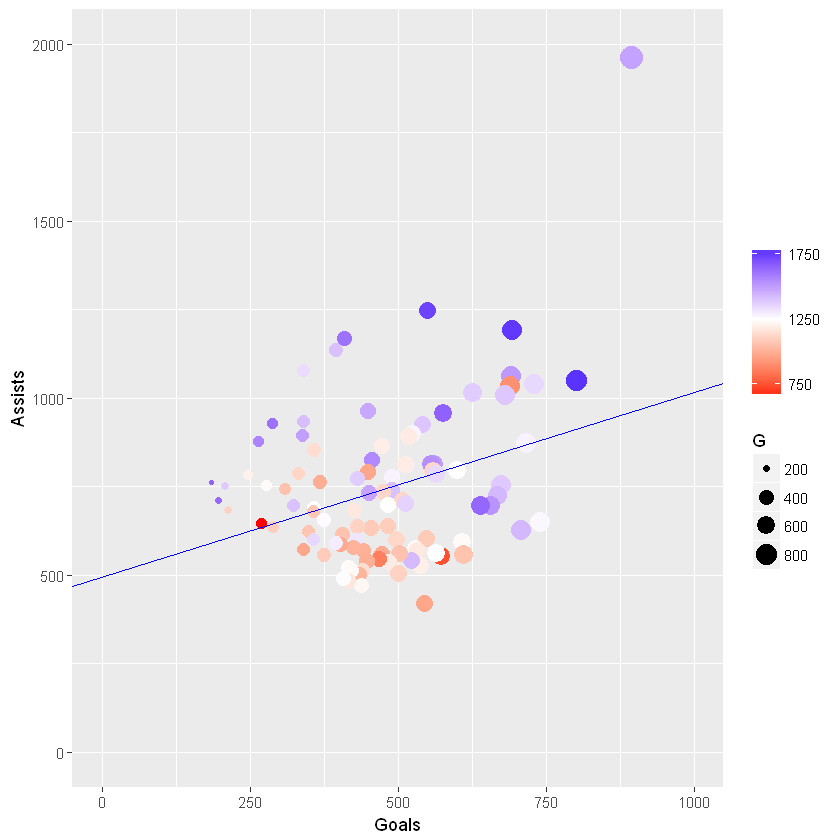

In [6]:
library(ggplot2)
ggplot(linear_data,aes(x=G,y=A))+xlab("Goals")+ylab("Assists")+
geom_point(aes(col=GP,size=G))+
geom_abline(intercept=494.5135,slope=0.5202,col="blue")+ ylim(0,2000) + xlim(0,1000)+
scale_color_gradient2(name="",
                         breaks = c(750,1250,1750),
                         labels = c("750","1250","1750"),low = "red", high = "blue", mid="white",midpoint=1250)

#### Part- A

Initial R-square and P

(Adjusted) R-square: 0.09913  and the P value: 0.0008317 of linear model 

# Part-B

For this we define different linear model by subtracting the x and y co-ordinates of the player Wayne Gretsky so that the line is passed theough that particular player

In [7]:
 model_wayne <- (lm(I(linear_data$A-1963) ~ I(linear_data$G-894) + 0, data=linear_data))

In [8]:
summary(model_wayne)


Call:
lm(formula = I(linear_data$A - 1963) ~ I(linear_data$G - 894) + 
    0, data = linear_data)

Residuals:
   Min     1Q Median     3Q    Max 
-902.2 -333.4 -145.4  103.3  703.4 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
I(linear_data$G - 894)   2.6847     0.0853   31.48   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 375.7 on 99 degrees of freedom
Multiple R-squared:  0.9091,	Adjusted R-squared:  0.9082 
F-statistic: 990.7 on 1 and 99 DF,  p-value: < 2.2e-16


In [9]:
coef(model_wayne)

I(linear_data$G - 894) 
              2.684662

Now we plot this by using the same functions and using the values given by the linear model

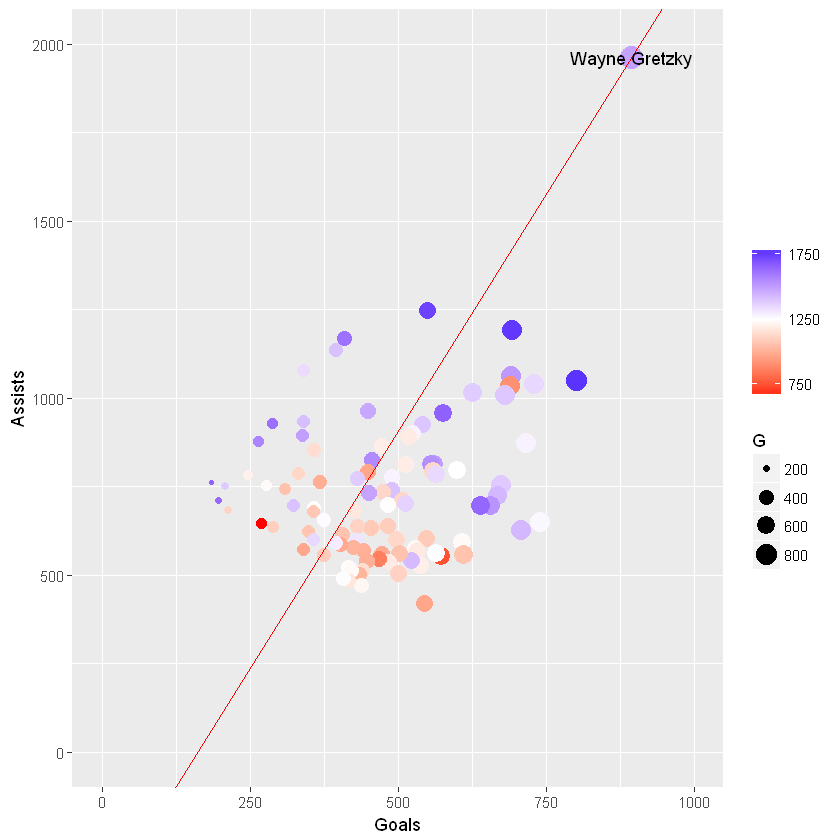

In [10]:
library(ggplot2)
ggplot(linear_data,aes(x=G,y=A))+xlab("Goals")+ylab("Assists")+
geom_point(aes(col=GP,size=G))+
geom_abline(intercept=-437.1218,slope=2.6846,col="red")+ ylim(0,2000) + xlim(0,1000)+
geom_text(data=linear_data[1,],label="Wayne Gretzky")+
scale_color_gradient2(name="",
                         breaks = c(750,1250,1750),
                         labels = c("750","1250","1750"),low = "red", high = "blue", mid="white", midpoint=1250)

### Part B
(Adjusted) R-square: 0.9082
P value: 2.2e-16 when we sepcifically pass the line through wayne Grestsky

# Part-C

Now we add one new row using rbind the information of the player Patrick Kane and the non-numeric data is converted into numeric by using R function

In [11]:
new_data <-do.call(data.frame,setNames(as.list(c(101,"Patrick Kane","CHI","R","2007-2008","2016-2017",735,285,462,747,81,284,86,0,49,0,3,2290)), names(linear_data)))
newlinear_data <- rbind(linear_data,new_data)
newlinear_data$G <- as.numeric(newlinear_data$G) 
newlinear_data$A <- as.numeric(newlinear_data$A)
newlinear_data$GP <- as.numeric(newlinear_data$GP)

Now we create the linear model by adding this new data and get the vcalue of intercept and slope

In [12]:
model_Patrick <- (lm(I(newlinear_data$A-462) ~ I(newlinear_data$G-285) + 0))

In [13]:
summary(model_Patrick)
coef(model_Patrick)


Call:
lm(formula = I(newlinear_data$A - 462) ~ I(newlinear_data$G - 
    285) + 0)

Residuals:
    Min      1Q  Median      3Q     Max 
-337.54 -112.83   40.72  167.42  803.74 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
I(newlinear_data$G - 285)  1.14493    0.09825   11.65   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 230.6 on 100 degrees of freedom
Multiple R-squared:  0.5759,	Adjusted R-squared:  0.5717 
F-statistic: 135.8 on 1 and 100 DF,  p-value: < 2.2e-16


I(newlinear_data$G - 285) 
                 1.144932

Now we plot this by using the same functions and using the values given by the linear model

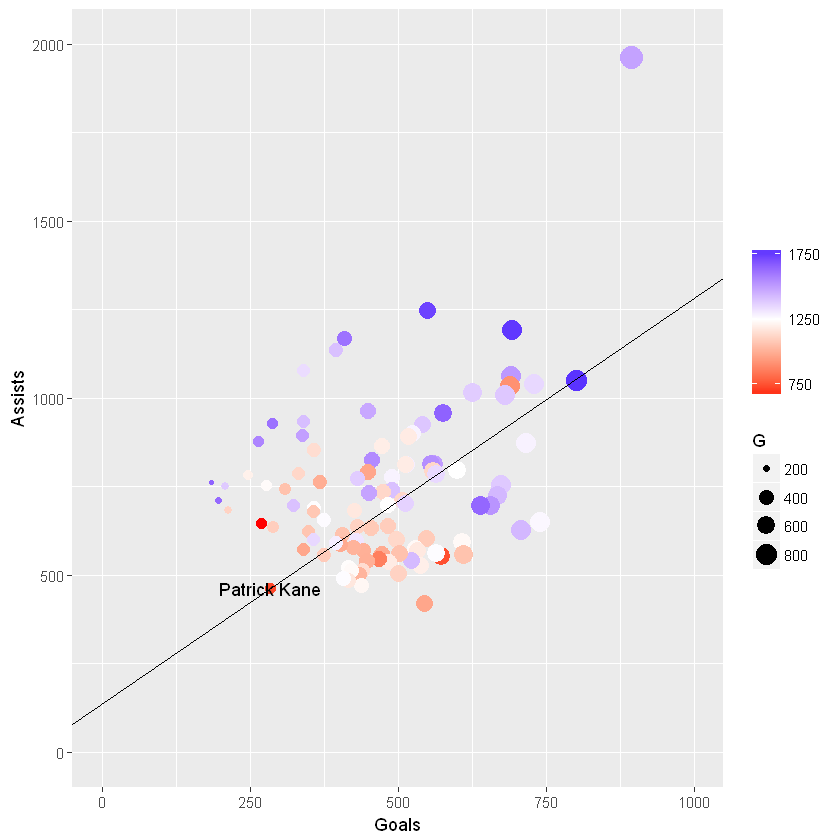

In [14]:
library(ggplot2)
ggplot(newlinear_data,aes(x=G,y=A))+xlab("Goals")+ylab("Assists")+
geom_point(aes(col=GP,size=G))+
geom_abline(intercept=135.675,slope=1.145,col="black")+ ylim(0,2000) + xlim(0,1000)+
geom_text(data=newlinear_data[101,],label="Patrick Kane")+
scale_color_gradient2(name="",
                         breaks = c(750,1250,1750),
                         labels = c("750","1250","1750"),low = "red", high = "blue", mid="white", midpoint=1250)

#### Part-C
(Adjusted) R-square: 0.5717
P value: 2.2e-16 when we pass the line specifically through Patrick kane

# Part-D

Now we want to show the combined plot of the simple lm, then we pass through Wayne Getsky and the player Patrick Kane

In [15]:
linear_model_combine<-lm(A~G, data=newlinear_data)   # New regression line with source as newframe
linear_model_combine


Call:
lm(formula = A ~ G, data = newlinear_data)

Coefficients:
(Intercept)            G  
    484.318        0.538  


In [16]:
linear_model_combine2<-lm(I(newlinear_data$A-1963) ~ I(newlinear_data$G-894)+0)
linear_model_combine2


Call:
lm(formula = I(newlinear_data$A - 1963) ~ I(newlinear_data$G - 
    894) + 0)

Coefficients:
I(newlinear_data$G - 894)  
                    2.681  


Now we plot all the 3 lines on the same graph the labels are mentioned accordingly

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.


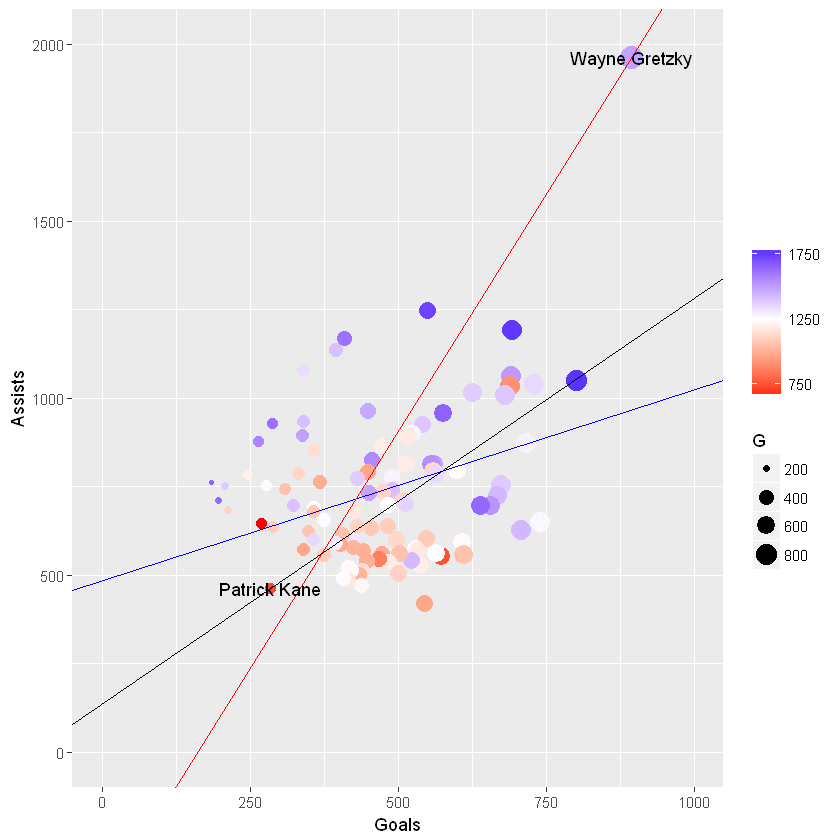

In [17]:
library(ggplot2)
ggplot(newlinear_data,aes(x=G,y=A))+xlab("Goals")+ylab("Assists")+
geom_point(aes(col=GP,size=G))+

geom_abline(intercept=484.318,slope=0.538,col="blue")+ ylim(0,2000) + xlim(0,1000)+

geom_abline(intercept=-433.814,slope=2.681,col="red")+ ylim(0,2000) + xlim(0,1000)+
geom_text(data=newlinear_data[1,],label="Wayne Gretzky")+

geom_abline(intercept=135.675,slope=1.145,col="black")+ ylim(0,2000) + xlim(0,1000)+
geom_text(data=newlinear_data[101,],label="Patrick Kane")+
scale_color_gradient2(name="",
                         breaks = c(750,1250,1750),
                         labels = c("750","1250","1750"), low = "red", high = "blue", mid="white",midpoint=1250)

# Part-D

Now we want the line should pass through 0 so in linear model we set the intercept 0 and see the value of slope to plot the graph

In [18]:
model_pass0 <- lm(A~G+0,data=linear_data)
model_pass0
summary(model_pass0)


Call:
lm(formula = A ~ G + 0, data = linear_data)

Coefficients:
   G  
1.48  



Call:
lm(formula = A ~ G + 0, data = linear_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-446.93 -137.40    1.88  159.73  639.58 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
G  1.48033    0.05009   29.55   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 247.9 on 99 degrees of freedom
Multiple R-squared:  0.8982,	Adjusted R-squared:  0.8972 
F-statistic: 873.4 on 1 and 99 DF,  p-value: < 2.2e-16


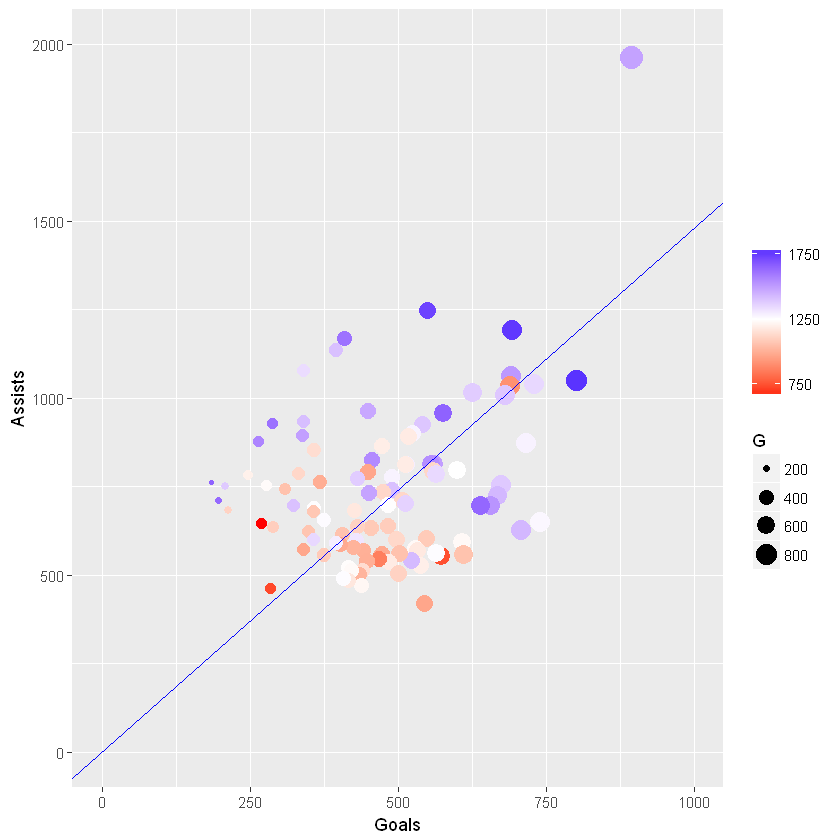

In [19]:
library(ggplot2)
ggplot(newlinear_data,aes(x=G,y=A))+xlab("Goals")+ylab("Assists")+
geom_point(aes(col=GP,size=G))+
geom_abline(intercept=0,slope=1.480,col="blue")+ ylim(0,2000) + xlim(0,1000)+
scale_color_gradient2(name="",
                         breaks = c(750,1250,1750),
                         labels = c("750","1250","1750"),low = "red", high = "blue", mid="white", midpoint=1250)

#### Part- D 

Adjusted R-Square: 0.8982 
P-Value: 2.2e-16 when forcing the line to pass through origin

Now we need to pass the Wayne Gretsky line to pass through 0 and so we set the intercept 0 and using the linear formula and calculate the slope and plot the points , line accordingly

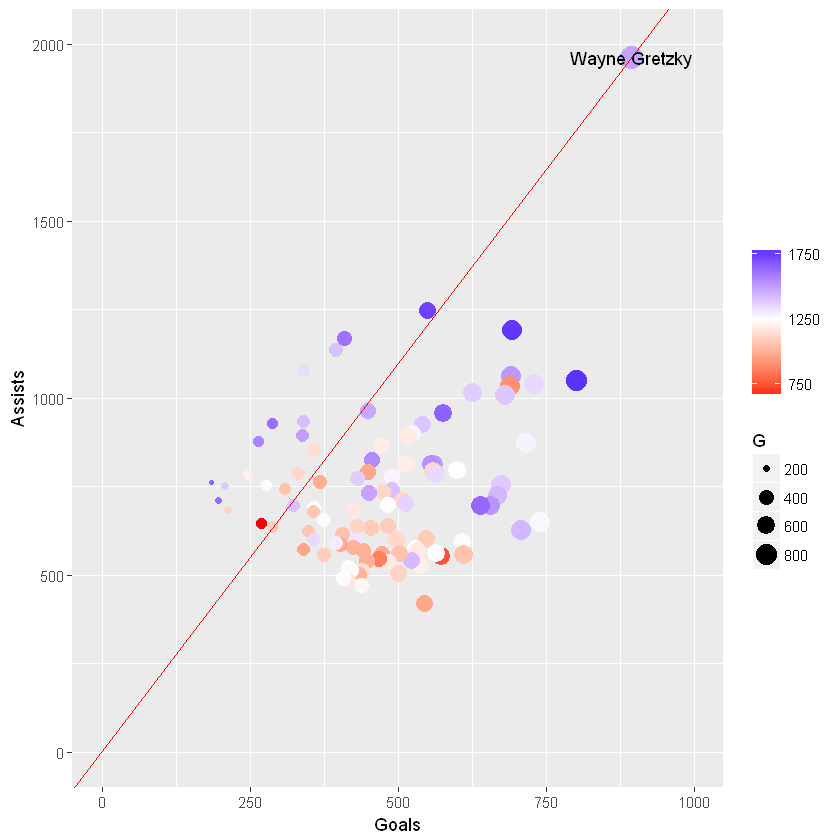

In [20]:
library(ggplot2)
ggplot(linear_data,aes(x=G,y=A))+xlab("Goals")+ylab("Assists")+
geom_point(aes(col=GP,size=G))+
geom_abline(intercept=0,slope=2.195,col="red")+ ylim(0,2000) + xlim(0,1000)+
geom_text(data=linear_data[1,],label="Wayne Gretzky")+
scale_color_gradient2(name="",
                         breaks = c(750,1250,1750),
                         labels = c("750","1250","1750"),low = "red", high = "blue", mid="white", midpoint=1250)

We do the same phenomenon for the Patrick Wane line and using intercept and calculate the slope and the plot the values

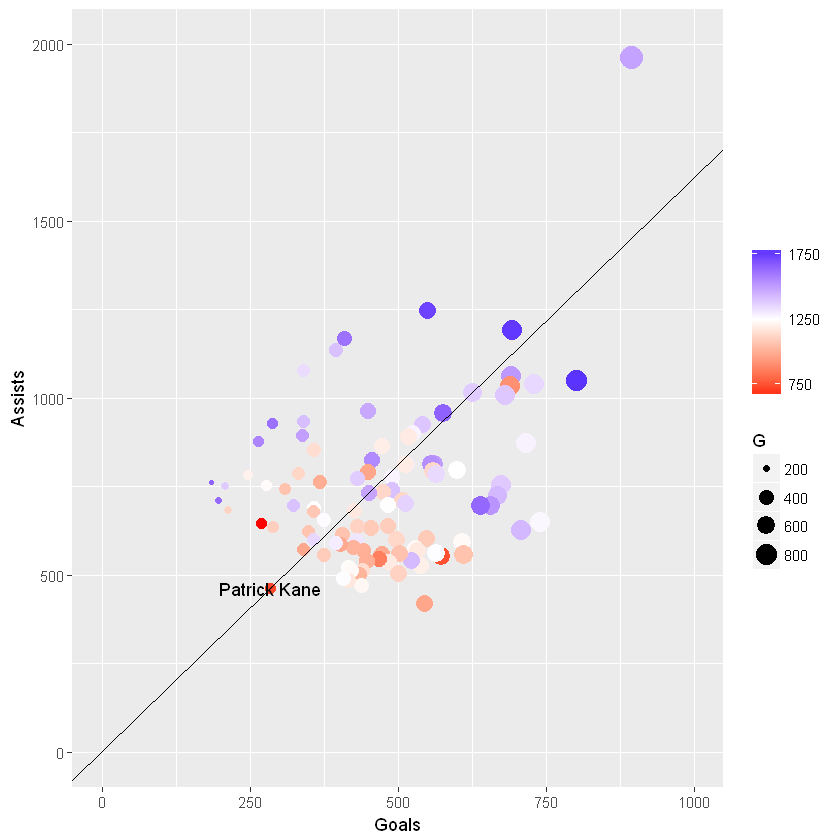

In [21]:
library(ggplot2)
ggplot(newlinear_data,aes(x=G,y=A))+xlab("Goals")+ylab("Assists")+
geom_point(aes(col=GP,size=G))+
geom_abline(intercept=0,slope=1.6210,col="black")+ ylim(0,2000) + xlim(0,1000)+
geom_text(data=newlinear_data[101,],label="Patrick Kane")+
scale_color_gradient2(name="",
                         breaks = c(750,1250,1750),
                         labels = c("750","1250","1750"),
                         low = "red", high = "blue", mid="white", midpoint=1250)

 Now we combine all the three lines as we did previously and pass them through origin for better visualization of data

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.


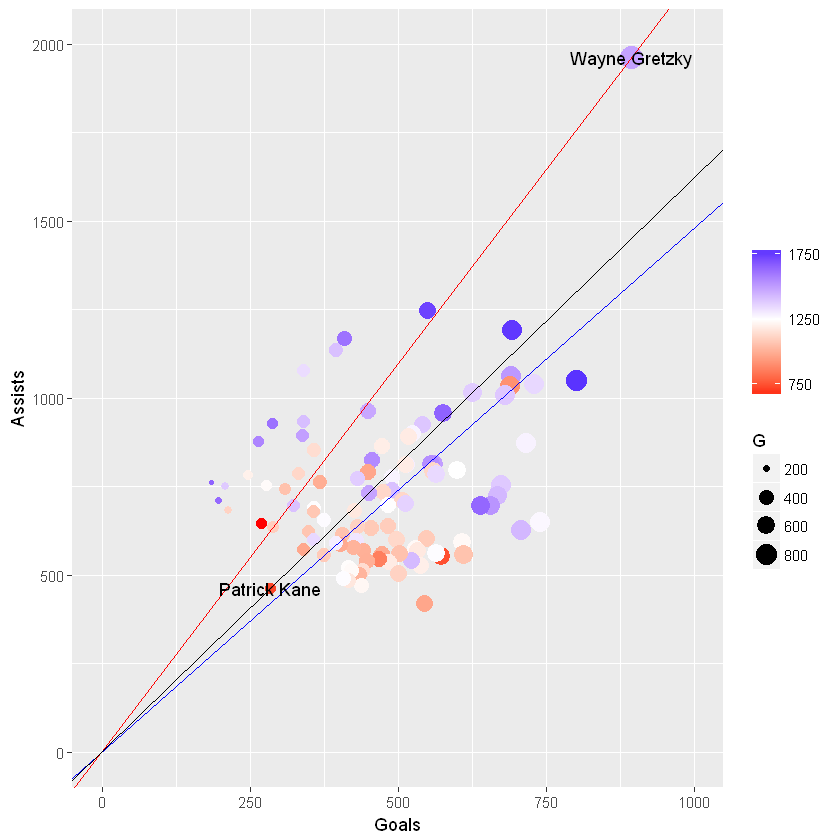

In [22]:
library(ggplot2)
ggplot(newlinear_data,aes(x=G,y=A))+xlab("Goals")+ylab("Assists")+
geom_point(aes(col=GP,size=G))+

geom_abline(intercept=0,slope=1.480,col="blue")+ ylim(0,2000) + xlim(0,1000)+

geom_abline(intercept=-0,slope=2.195,col="red")+ ylim(0,2000) + xlim(0,1000)+
geom_text(data=newlinear_data[1,],label="Wayne Gretzky")+

geom_abline(intercept=0,slope=1.621,col="black")+ ylim(0,2000) + xlim(0,1000)+
geom_text(data=newlinear_data[101,],label="Patrick Kane")+
scale_color_gradient2(name="",
                         breaks = c(750,1250,1750),
                         labels = c("750","1250","1750"),low = "red", high = "blue", mid="white", midpoint=1250)

# Part-E

In [23]:
Name_model<-c("model1","model_wayne","model_patrick","model_pass0")
R_Square_Adjust<-c(0.09913,0.9082,0.5717,0.8982)
P_Value<-c(0.0008317,2.2e-16,2.2e-16,2.2e-16)
final_table<-data.frame(Name_model,R_Square_Adjust,P_Value)
final_table

Name_model,R_Square_Adjust,P_Value
model1,0.09913,8.317e-04
model_wayne,0.90820,2.200e-16
model_patrick,0.57170,2.200e-16
model_pass0,0.89820,2.200e-16


### Intepretation of Data

Firstly, we observe that in model1 and model_pass0 are the same linear model the only difference is one passes through the origin but it makes difference in R_square and P-value, R square is more for model_pass0 when line passes through origin and the p-value is less considerably and shows how passing through origin makes difference.

Secondly we see that model1 and model_wayne when line is forced to pass through the player Wayne Getsky the value of R_square considerably increases and p-value decreases because we are not making the exact intercepts

Thirdly, we see in model_wayne and model_patrick in both we force the line to pass through a particular point the value of R_sqaure is less for model_patrick but the p-value is same for both which is an important point to observe.

Fourthly we see through the plots show which model best fits the data and the difference is there in intercepts when we make changes and make them pass through origin and which fits more than the other.